#Optimisation
(TSP:travelling Salseman Problem)
"Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?"

**Heuristic Solution**
Trial and error is an exmaple, it is going to be a solution, may be not the best one, we can use our own experience.Like for the above, an example can be travelling to cities in an alphabetical order.It is not the best solution, but it is a possible solution

<img.src= "https://optimization.cbe.cornell.edu/images/e/ea/48StatesTSP.png">

In [ ]:
url="https://en.wikipedia.org/wiki/List_of_capitals_in_the_United_States"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=len(pd.read_html(url))# 10 because we have 10 different tables

In [ ]:
df=pd.read_html(url)[2]#getting table.2 from the page
df=df.iloc[:,:2]
df.columns=['State','Capital']
print(df.shape)
df.head()

(51, 2)


,State,Capital
0,Alabama,Montgomery
1,Alaska,Juneau
2,Arizona,Phoenix
3,Arkansas,Little Rock
4,California,Sacramento


In [ ]:
#from geopy call nominatim
!pip install geopy
from geopy import Nominatim



In [ ]:
geolocator=Nominatim(user_agent="my_application")
location=geolocator.geocode("175 5th Avenue NYC ")

In [ ]:
location.longitude,location.latitude

(-73.9897246, 40.7410978)

In [ ]:
df=df.drop([1,10,50]).reset_index(drop=True)

In [ ]:
#Alaska , Hawaii,Footer
df['Place']=df["Capital"]+" , "+df["State"]
df.head()

,State,Capital,Place
0,Alabama,Montgomery,"Montgomery , Alabama"
1,Arizona,Phoenix,"Phoenix , Arizona"
2,Arkansas,Little Rock,"Little Rock , Arkansas"
3,California,Sacramento,"Sacramento , California"
4,Colorado,Denver,"Denver , Colorado"


In [ ]:
city_loc=geolocator.geocode("Montgomery, Alabama")
city_loc.longitude,city_loc.latitude

(-86.3006485, 32.3669656)

In [ ]:
df['lat']= df.Place.apply(lambda cell: geolocator.geocode(
    cell).latitude)
df['lon']= df.Place.apply(lambda cell:geolocator.geocode(
    cell).longitude)

In [ ]:
df.to_csv('data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/your_file_name.csv')

In [ ]:
usa_url='https://raw.githubusercontent.com/PublicaMundi/MappingAPI/refs/heads/master/data/geojson/us-states.json'#check github map api

In [ ]:
import geopandas as gpd

<Axes: >

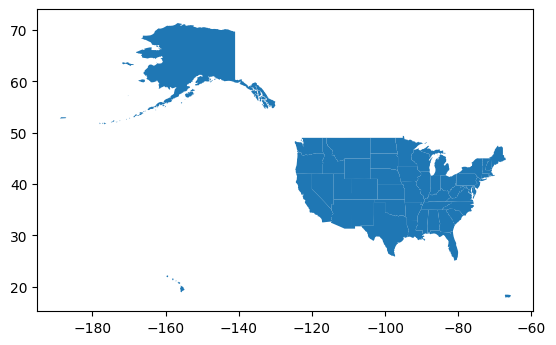

In [ ]:
gpd.read_file(usa_url).plot()

In [ ]:
gdf=gpd.read_file(usa_url)
gdf[gdf.name.isin(df.State)].shape

(48, 4)

In [ ]:
gdf=gdf[gdf.name.isin(df.State)]

In [ ]:
gdf.name.values

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
gdf.reset_index(inplace=True)

<Axes: >

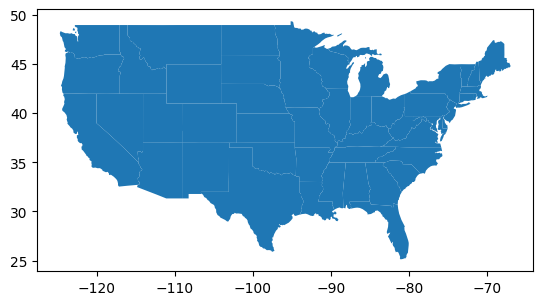

In [ ]:
df['geometry']=gdf['geometry']
df=gpd.GeoDataFrame(df)
df.plot()

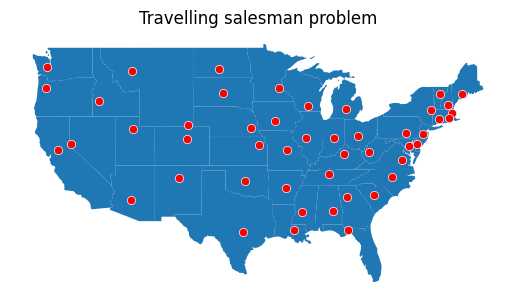

In [ ]:
fig,axs=plt.subplots()
df.plot(ax=axs)
sns.scatterplot(data=df,x='lon',y='lat',color='red')
plt.title("Travelling salesman problem")
axs.axis('off')
plt.show()


In [ ]:
gdf

,index,id,name,density,geometry
0,0,01,Alabama,94.650,"POLYGON ((-87.3593 35.00118, -85.60668 34.9847..."
1,2,04,Arizona,57.050,"POLYGON ((-109.0425 37.00026, -109.04798 31.33..."
2,3,05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
3,4,06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."
4,5,08,Colorado,49.330,"POLYGON ((-107.91973 41.00391, -105.72895 40.9..."
5,6,09,Connecticut,739.100,"POLYGON ((-73.05353 42.03905, -71.79931 42.022..."
6,7,10,Delaware,464.300,"POLYGON ((-75.41409 39.80446, -75.5072 39.6839..."
7,9,12,Florida,353.400,"POLYGON ((-85.49714 30.99754, -85.00421 31.003..."
8,10,13,Georgia,169.500,"POLYGON ((-83.10919 35.00118, -83.32279 34.787..."
9,12,16,Idaho,19.150,"POLYGON ((-116.04751 49.00024, -116.04751 47.9..."


#Build Cities

In [ ]:
class City:#methods are built inside classes and come with sub-arguemnts
  def __init__(self,name,lat,lon): #init used 2 double underscores
    self.name=name
    self.lat=lat
    self.lon=lon

  def Distance2City(self,dest):
    deltax=dest.lon-self.lon
    deltay=dest.lat-self.lat
    return round(pow(deltax**2+deltay**2, 0.5),4)

  def __repr__(self):
    return "({})".format(self.name)


In [ ]:
A=City(df.loc[0,'Place'],df.loc[0,'lat'],df.loc[0,'lon'])
B=City(df.loc[1,'Place'],df.loc[1,'lat'],df.loc[1,'lon'])
A,B

((Montgomery , Alabama), (Phoenix , Arizona))

In [ ]:
A.Distance2City(B)

25.7962

In [ ]:
B.Distance2City(A)

25.7962

#Genetic Algorithm

<img.src="https://media.geeksforgeeks.org/wp-content/uploads/20190614172704/geneticPhase1.png" width=400>
* Individual -> Solution
*Population -> Group of individuals
* Generation -> Change of population
*Gene -> Part of the solution
(descriptors)



In [ ]:
df.Place.values

array(['Montgomery , Alabama', 'Phoenix , Arizona',
       'Little Rock , Arkansas', 'Sacramento , California',
       'Denver , Colorado', 'Hartford , Connecticut', 'Dover , Delaware',
       'Tallahassee , Florida', 'Atlanta , Georgia', 'Boise , Idaho',
       'Springfield , Illinois', 'Indianapolis , Indiana',
       'Des Moines , Iowa', 'Topeka , Kansas', 'Frankfort , Kentucky',
       'Baton Rouge , Louisiana', 'Augusta , Maine',
       'Annapolis , Maryland', 'Boston , Massachusetts',
       'Lansing , Michigan', 'Saint Paul , Minnesota',
       'Jackson , Mississippi', 'Jefferson City , Missouri',
       'Helena , Montana', 'Lincoln , Nebraska', 'Carson City , Nevada',
       'Concord , New Hampshire', 'Trenton , New Jersey',
       'Santa Fe , New Mexico', 'Albany , New York',
       'Raleigh , North Carolina', 'Bismarck , North Dakota',
       'Columbus , Ohio', 'Oklahoma City , Oklahoma', 'Salem , Oregon',
       'Harrisburg , Pennsylvania', 'Providence , Rhode Island',
     

In [ ]:
def First_individual():
  return [City(df.loc[n,'Place'],
               df.loc[n,'lat'],
               df.loc[n,'lon'],)
               for n in range(df.shape[0])]

first_ind=First_individual()
print(first_ind)

[(Montgomery , Alabama), (Phoenix , Arizona), (Little Rock , Arkansas), (Sacramento , California), (Denver , Colorado), (Hartford , Connecticut), (Dover , Delaware), (Tallahassee , Florida), (Atlanta , Georgia), (Boise , Idaho), (Springfield , Illinois), (Indianapolis , Indiana), (Des Moines , Iowa), (Topeka , Kansas), (Frankfort , Kentucky), (Baton Rouge , Louisiana), (Augusta , Maine), (Annapolis , Maryland), (Boston , Massachusetts), (Lansing , Michigan), (Saint Paul , Minnesota), (Jackson , Mississippi), (Jefferson City , Missouri), (Helena , Montana), (Lincoln , Nebraska), (Carson City , Nevada), (Concord , New Hampshire), (Trenton , New Jersey), (Santa Fe , New Mexico), (Albany , New York), (Raleigh , North Carolina), (Bismarck , North Dakota), (Columbus , Ohio), (Oklahoma City , Oklahoma), (Salem , Oregon), (Harrisburg , Pennsylvania), (Providence , Rhode Island), (Columbia , South Carolina), (Pierre , South Dakota), (Nashville , Tennessee), (Austin , Texas), (Salt Lake City , U

In [ ]:
def TSP_route(ind,axs):
  for n in range(len(ind)):
    try:
      axs.plot([ind[n].lon,ind[n+1].lon],
               [ind[n].lat,ind[n+1].lat],
               color='green')
    except:
      axs.plot([ind[n].lon,ind[0].lon],
             [ind[n].lat,ind[0].lat],
             color='green')

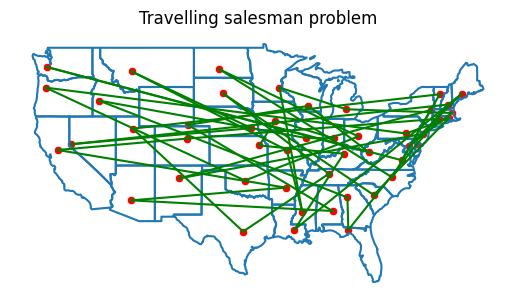

In [ ]:
fig,axs=plt.subplots()
df.boundary.plot(ax=axs)
sns.scatterplot(data=df,x='lon',y='lat',color='red')
plt.title("Travelling salesman problem")
TSP_route(first_ind,axs)
axs.axis('off')
plt.show()

In [ ]:
class Fitness:
  def __init__(self, route):
    self.route=route
    self.total_dist=self.TotalDistCalc()
    self.fitness_val=self.FitnessCalc()

  def TotalDistCalc(self):
    sum=0
    for n in range(len(self.route)):
      try:
        sum+=self.route[n].Distance2City(self.route[n+1])
      except:
        sum+=self.route[n].Distance2City(self.route[0])
    return sum

  def FitnessCalc(Self):
    return round(1/Self.total_dist,5)

Fitness(first_ind[:3]).total_dist

52.0677

In [ ]:
def FitnessCalc(self):
    return round(1/self.total_dist,5)

Fitness(first_ind[:3]).total_dist


52.0677

In [ ]:
first_ind[0].Distance2City(first_ind[1])+first_ind[1].Distance2City(first_ind[2])

45.6233

In [ ]:
Fitness(first_ind).fitness_val

0.0011

#Genetic algorithm chart
<img src="https://www.mdpi.com/proceedings/proceedings-83-00051/article_deploy/html/images/proceedings-83-00051-g001.png">

In [ ]:
import random
random.seed(1)
first_ind=First_individual()
print(first_ind)
random.shuffle(first_ind)
print(first_ind)

[(Montgomery , Alabama), (Phoenix , Arizona), (Little Rock , Arkansas), (Sacramento , California), (Denver , Colorado), (Hartford , Connecticut), (Dover , Delaware), (Tallahassee , Florida), (Atlanta , Georgia), (Boise , Idaho), (Springfield , Illinois), (Indianapolis , Indiana), (Des Moines , Iowa), (Topeka , Kansas), (Frankfort , Kentucky), (Baton Rouge , Louisiana), (Augusta , Maine), (Annapolis , Maryland), (Boston , Massachusetts), (Lansing , Michigan), (Saint Paul , Minnesota), (Jackson , Mississippi), (Jefferson City , Missouri), (Helena , Montana), (Lincoln , Nebraska), (Carson City , Nevada), (Concord , New Hampshire), (Trenton , New Jersey), (Santa Fe , New Mexico), (Albany , New York), (Raleigh , North Carolina), (Bismarck , North Dakota), (Columbus , Ohio), (Oklahoma City , Oklahoma), (Salem , Oregon), (Harrisburg , Pennsylvania), (Providence , Rhode Island), (Columbia , South Carolina), (Pierre , South Dakota), (Nashville , Tennessee), (Austin , Texas), (Salt Lake City , U

#Check from below for mistakes

In [ ]:
def First_Generation(individual,seed=0,pop_size=20):
  random.seed(seed)
  pop={0:individual}
  print(pop[0])
  for n in range(1,pop_size):
    pop[n]=random.sampl(individual,len(individual))
  return pop

  gen1=(First_Generation(first_ind))



In [ ]:
import random

def First_Generation(individual, seed=0, pop_size=20):
  np.random.seed(seed)
  pop={0:individual}

  for n in range(1, pop_size):
    pop[n] = random.sample(individual, len(individual))
  return pop
gen1=First_Generation(first_ind)
#print(First_Generation(first_ind)[0])
print(gen1[0])

[(Olympia , Washington), (Baton Rouge , Louisiana), (Charleston , West Virginia), (Boise , Idaho), (Hartford , Connecticut), (Harrisburg , Pennsylvania), (Little Rock , Arkansas), (Frankfort , Kentucky), (Lansing , Michigan), (Salem , Oregon), (Oklahoma City , Oklahoma), (Madison , Wisconsin), (Austin , Texas), (Concord , New Hampshire), (Indianapolis , Indiana), (Pierre , South Dakota), (Columbia , South Carolina), (Des Moines , Iowa), (Jackson , Mississippi), (Annapolis , Maryland), (Saint Paul , Minnesota), (Jefferson City , Missouri), (Albany , New York), (Columbus , Ohio), (Springfield , Illinois), (Sacramento , California), (Boston , Massachusetts), (Richmond , Virginia), (Carson City , Nevada), (Helena , Montana), (Cheyenne , Wyoming), (Salt Lake City , Utah), (Montgomery , Alabama), (Trenton , New Jersey), (Nashville , Tennessee), (Phoenix , Arizona), (Montpelier , Vermont), (Dover , Delaware), (Topeka , Kansas), (Lincoln , Nebraska), (Raleigh , North Carolina), (Santa Fe , New

In [ ]:
len(gen1)

20

In [ ]:
Fitness(gen1[0]).fitness_val,Fitness(gen1[16]).fitness_val

(0.00103, 0.00113)

In [ ]:
len(gen1)

20

In [ ]:
def rank_pop(pop):
  pop_df=pd.DataFrame(np.zeros((len(pop),3)),
                      columns=['id','sol','fit'])

  pop_df['id']=pop.keys()
  pop_df['sol']=pop.values()
  for n in range(len(pop)):
    pop_df.iloc[n,-1]=Fitness(pop[n]).fitness_val



  return pop_df.sort_values('fit',ascending=False).reset_index(drop=True)

rank_pop(gen1)

,id,sol,fit
0,4,"[(Sacramento , California), (Salem , Oregon), ...",0.00134
1,1,"[(Boston , Massachusetts), (Phoenix , Arizona)...",0.00130
2,13,"[(Concord , New Hampshire), (Montpelier , Verm...",0.00125
3,19,"[(Albany , New York), (Richmond , Virginia), (...",0.00120
4,15,"[(Montgomery , Alabama), (Little Rock , Arkans...",0.00118
5,3,"[(Phoenix , Arizona), (Columbia , South Caroli...",0.00116
6,7,"[(Austin , Texas), (Pierre , South Dakota), (D...",0.00116
7,16,"[(Denver , Colorado), (Indianapolis , Indiana)...",0.00113
8,5,"[(Little Rock , Arkansas), (Concord , New Hamp...",0.00113
9,10,"[(Oklahoma City , Oklahoma), (Columbia , South...",0.00111


In [ ]:
def Mating_pool(ranked_pop,elite_size=10):
  mp={}
  for n in range(elite_size):
    mp[n]=ranked_pop.iloc[n,1]
  while n <len(ranked_pop):
    i=np.random.randint(0,len(ranked_pop))
    mp[n]=ranked_pop.iloc[i,1]
    n+=1
  return mp

len(Mating_pool(rank_pop(gen1)))





20

In [ ]:
Mating_pool(rank_pop(gen1)).values()

dict_values([[(Sacramento , California), (Salem , Oregon), (Charleston , West Virginia), (Oklahoma City , Oklahoma), (Carson City , Nevada), (Montgomery , Alabama), (Richmond , Virginia), (Nashville , Tennessee), (Indianapolis , Indiana), (Trenton , New Jersey), (Tallahassee , Florida), (Lincoln , Nebraska), (Topeka , Kansas), (Baton Rouge , Louisiana), (Atlanta , Georgia), (Saint Paul , Minnesota), (Santa Fe , New Mexico), (Raleigh , North Carolina), (Columbus , Ohio), (Providence , Rhode Island), (Hartford , Connecticut), (Little Rock , Arkansas), (Cheyenne , Wyoming), (Dover , Delaware), (Denver , Colorado), (Helena , Montana), (Springfield , Illinois), (Jefferson City , Missouri), (Harrisburg , Pennsylvania), (Concord , New Hampshire), (Lansing , Michigan), (Salt Lake City , Utah), (Olympia , Washington), (Des Moines , Iowa), (Jackson , Mississippi), (Pierre , South Dakota), (Bismarck , North Dakota), (Boise , Idaho), (Madison , Wisconsin), (Frankfort , Kentucky), (Albany , New Yor

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190620121215/singleCrossover-2.png">

In [ ]:
def Breed_ind(indA, indB):
  i1=np.random.randint(0,len(indA))

 # i1=np.ranodm.randint(0,len(indA))
  while True:
    i2=np.random.randint(0,len(indA))
    if i1!=i2:
      break
  slice1=min(i1,i2)
  slice2=max(i1,i2)

  genes1=indA[slice1:slice2]

  genes2=[gene for gene in indB if gene not in genes1]

  return genes1+genes2




In [ ]:
print(gen1[0])
print(gen1[15])
print(Breed_ind(gen1[0],gen1[15]))

[(Olympia , Washington), (Baton Rouge , Louisiana), (Charleston , West Virginia), (Boise , Idaho), (Hartford , Connecticut), (Harrisburg , Pennsylvania), (Little Rock , Arkansas), (Frankfort , Kentucky), (Lansing , Michigan), (Salem , Oregon), (Oklahoma City , Oklahoma), (Madison , Wisconsin), (Austin , Texas), (Concord , New Hampshire), (Indianapolis , Indiana), (Pierre , South Dakota), (Columbia , South Carolina), (Des Moines , Iowa), (Jackson , Mississippi), (Annapolis , Maryland), (Saint Paul , Minnesota), (Jefferson City , Missouri), (Albany , New York), (Columbus , Ohio), (Springfield , Illinois), (Sacramento , California), (Boston , Massachusetts), (Richmond , Virginia), (Carson City , Nevada), (Helena , Montana), (Cheyenne , Wyoming), (Salt Lake City , Utah), (Montgomery , Alabama), (Trenton , New Jersey), (Nashville , Tennessee), (Phoenix , Arizona), (Montpelier , Vermont), (Dover , Delaware), (Topeka , Kansas), (Lincoln , Nebraska), (Raleigh , North Carolina), (Santa Fe , New

<img src="https://th.bing.com/th/id/OIP.Ut5ytwjhTYxj9gVXtd-47QAAAA?rs=1&pid=ImgDetMain">

#Above is Charles Darwin and this theory regarding the adaptability of the bird called Finches

<img src="https://xaktly.com/Images/Mathematics/CurveSketchingFigures/GlobalLocalMaxMinFigure.png">

In [ ]:
def Mutation(individual,mutation_rate=0.05):
  for n in range(len(individual)):
    if np.random.rand()<mutation_rate:
      i=np.random.randint(0,len(individual))
      gene1=individual[n]
      gene2=individual[i]
      individual[n]=gene2
      individual[i]=gene1
  return individual



In [ ]:
np.random.choice(rank_pop(gen1).iloc[:,0])


19

In [ ]:
def New_Generation(current_gen,elite_size,mutation_rate):
  rank_gen=rank_pop(current_gen)
  mp_rank_gen=Mating_pool(rank_gen,elite_size)

  new_gen=[mp_rank_gen[m]for m in range(elite_size)]

  for n in range(len(current_gen)-elite_size):
   a=np.random.choice(range(0,len(mp_rank_gen)))
   b=np.random.choice(range(0,len(mp_rank_gen)))
   offspring=Breed_ind(mp_rank_gen[a],mp_rank_gen[b])
   offspring=Mutation(offspring,mutation_rate)
   new_gen.append(offspring)
  return new_gen



In [ ]:
New_Generation(gen1,10,0.05)

[[(Sacramento , California),
  (Salem , Oregon),
  (Charleston , West Virginia),
  (Oklahoma City , Oklahoma),
  (Carson City , Nevada),
  (Montgomery , Alabama),
  (Richmond , Virginia),
  (Nashville , Tennessee),
  (Indianapolis , Indiana),
  (Trenton , New Jersey),
  (Tallahassee , Florida),
  (Lincoln , Nebraska),
  (Topeka , Kansas),
  (Baton Rouge , Louisiana),
  (Atlanta , Georgia),
  (Saint Paul , Minnesota),
  (Santa Fe , New Mexico),
  (Raleigh , North Carolina),
  (Columbus , Ohio),
  (Providence , Rhode Island),
  (Hartford , Connecticut),
  (Little Rock , Arkansas),
  (Cheyenne , Wyoming),
  (Dover , Delaware),
  (Denver , Colorado),
  (Helena , Montana),
  (Springfield , Illinois),
  (Jefferson City , Missouri),
  (Harrisburg , Pennsylvania),
  (Concord , New Hampshire),
  (Lansing , Michigan),
  (Salt Lake City , Utah),
  (Olympia , Washington),
  (Des Moines , Iowa),
  (Jackson , Mississippi),
  (Pierre , South Dakota),
  (Bismarck , North Dakota),
  (Boise , Idaho),
  

In [ ]:
first_ind

[(Olympia , Washington),
 (Baton Rouge , Louisiana),
 (Charleston , West Virginia),
 (Boise , Idaho),
 (Hartford , Connecticut),
 (Harrisburg , Pennsylvania),
 (Little Rock , Arkansas),
 (Frankfort , Kentucky),
 (Lansing , Michigan),
 (Salem , Oregon),
 (Oklahoma City , Oklahoma),
 (Madison , Wisconsin),
 (Austin , Texas),
 (Concord , New Hampshire),
 (Indianapolis , Indiana),
 (Pierre , South Dakota),
 (Columbia , South Carolina),
 (Des Moines , Iowa),
 (Jackson , Mississippi),
 (Annapolis , Maryland),
 (Saint Paul , Minnesota),
 (Jefferson City , Missouri),
 (Albany , New York),
 (Columbus , Ohio),
 (Springfield , Illinois),
 (Sacramento , California),
 (Boston , Massachusetts),
 (Richmond , Virginia),
 (Carson City , Nevada),
 (Helena , Montana),
 (Cheyenne , Wyoming),
 (Salt Lake City , Utah),
 (Montgomery , Alabama),
 (Trenton , New Jersey),
 (Nashville , Tennessee),
 (Phoenix , Arizona),
 (Montpelier , Vermont),
 (Dover , Delaware),
 (Topeka , Kansas),
 (Lincoln , Nebraska),
 (Ra

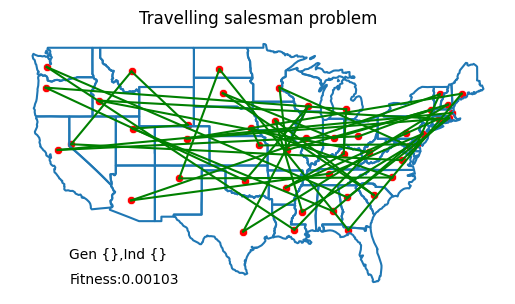

In [ ]:
fig,axs=plt.subplots()
df.boundary.plot(ax=axs)
sns.scatterplot(data=df,x='lon',y='lat',color='red')
plt.title("Travelling salesman problem")
TSP_route(first_ind,axs)
axs.text(-120,27.5,"Gen {},Ind {}")
axs.text(-120,25,"Fitness:{}".format(Fitness(first_ind).fitness_val))
axs.axis('off')
plt.show()

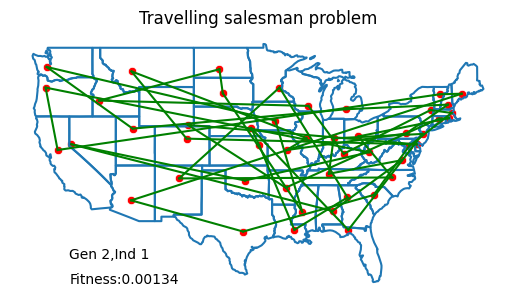

In [ ]:
gen2 = New_Generation(gen1, 10, 0.05)
fig,axs=plt.subplots()
df.boundary.plot(ax=axs)
sns.scatterplot(data=df,x='lon',y='lat',color='red')
plt.title("Travelling salesman problem")
TSP_route(gen2[0],axs)
axs.text(-120,27.5,"Gen {},Ind {}".format(2,1))
axs.text(-120,25,"Fitness:{}".format(Fitness(gen2[0]).fitness_val))
axs.axis('off')
plt.show()

In [ ]:
def GA(first_gen,num_gens,elite_size,mutation_rate):
  top_individuals=[first_gen[0]]
  current_gen=first_gen
  for g in range(num_gens):
    Next_gen=New_Generation(current_gen,elite_size,mutation_rate)
    top_individuals.append(Next_gen[0])
    current_gen={j:Next_gen[j] for j in range(len(Next_gen))}
  return current_gen,top_individuals

In [ ]:
type(gen1)

dict

In [ ]:
list(gen1.values())

[[(Olympia , Washington),
  (Baton Rouge , Louisiana),
  (Charleston , West Virginia),
  (Boise , Idaho),
  (Hartford , Connecticut),
  (Harrisburg , Pennsylvania),
  (Little Rock , Arkansas),
  (Frankfort , Kentucky),
  (Lansing , Michigan),
  (Salem , Oregon),
  (Oklahoma City , Oklahoma),
  (Madison , Wisconsin),
  (Austin , Texas),
  (Concord , New Hampshire),
  (Indianapolis , Indiana),
  (Pierre , South Dakota),
  (Columbia , South Carolina),
  (Des Moines , Iowa),
  (Jackson , Mississippi),
  (Annapolis , Maryland),
  (Saint Paul , Minnesota),
  (Jefferson City , Missouri),
  (Albany , New York),
  (Columbus , Ohio),
  (Springfield , Illinois),
  (Sacramento , California),
  (Boston , Massachusetts),
  (Richmond , Virginia),
  (Carson City , Nevada),
  (Helena , Montana),
  (Cheyenne , Wyoming),
  (Salt Lake City , Utah),
  (Montgomery , Alabama),
  (Trenton , New Jersey),
  (Nashville , Tennessee),
  (Phoenix , Arizona),
  (Montpelier , Vermont),
  (Dover , Delaware),
  (Topeka

In [ ]:
gen100=GA(gen1,100,10,0.05)

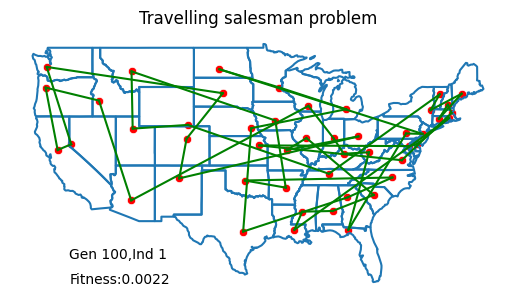

In [ ]:
fig,axs=plt.subplots()
df.boundary.plot(ax=axs)
sns.scatterplot(data=df,x='lon',y='lat',color='red')
plt.title("Travelling salesman problem")
TSP_route(gen100[0][0],axs)
axs.text(-120,27.5,"Gen {},Ind {}".format(100,1))
axs.text(-120,25,"Fitness:{}".format(Fitness(gen100[0][0]).fitness_val))
axs.axis('off')
plt.show()

In [ ]:
len(gen100[1])

101

In [ ]:
def plot_GA(num):
 fig,axs=plt.subplots()
 df.boundary.plot(ax=axs)
 sns.scatterplot(data=df,x='lon',y='lat',color='red')
 plt.title("Travelling salesman problem")
 TSP_route(gen100[1][num],axs)
 axs.text(-120,27.5,"Gen {},Ind {}".format(num,1))
 axs.text(-120,25,"Fitness:{}".format(Fitness(gen100[1][num]).fitness_val))
 axs.axis('off')
plt.show()


In [ ]:
!pip install ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import ipywidgets as w

interactive(children=(IntSlider(value=0, description='num', step=10), Output()), _dom_classes=('widget-interac…

<function __main__.plot_GA(num)>

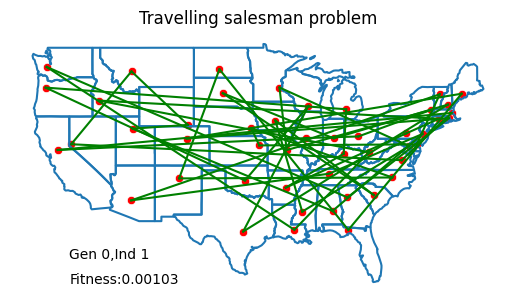

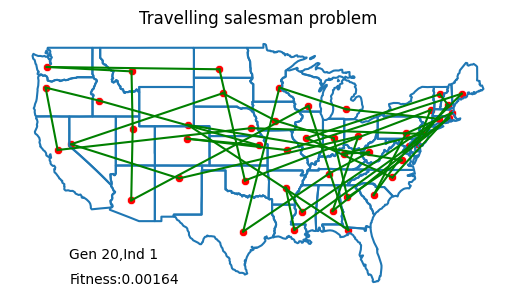

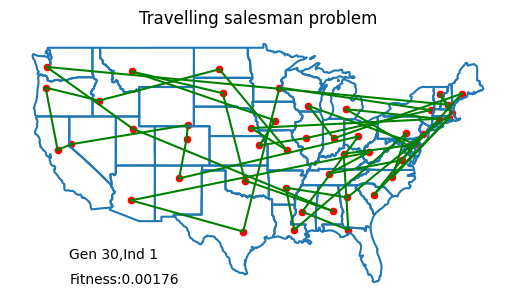

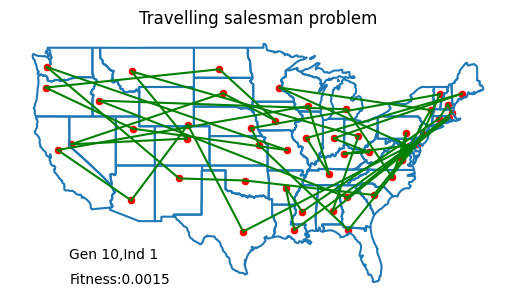

In [ ]:
w.interact(plot_GA,num=w.IntSlider(min=0,max=100,step=10,value=0))

MidTerm presentation next week Wednesday
No Office hours next week
After the presentation, we will get to access canvas
today was the last thing reg Python
Objective of the presentation, data story telling, hypothesis , problem that we are analysing